In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_mutual_info_score

In [2]:
# test = pd.read_csv('./dataset/header.csv',header=None)
# test.values.tolist()

In [3]:
tags = [ i for i in pd.read_csv('./dataset/header.csv')]
#print (tags)

In [4]:
df = pd.read_csv('./dataset/raw_data.csv')
display(df)

,ID,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label
0,1651,172.217.29.66-10.200.7.196-443-39485-6,10.200.7.196,39485,172.217.29.66,443,6,26/04/201711:11:25,2021337,9,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,6460,179.1.4.244-10.200.7.196-443-43024-6,10.200.7.196,43024,179.1.4.244,443,6,26/04/201711:11:53,65552,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,6578,179.1.4.244-10.200.7.196-443-43031-6,10.200.7.196,43031,179.1.4.244,443,6,26/04/201711:11:54,107032,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,7219,179.1.4.244-10.200.7.196-443-43064-6,10.200.7.196,43064,179.1.4.244,443,6,26/04/201711:11:58,75351,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,7683,179.1.4.244-10.200.7.196-443-43076-6,10.200.7.196,43076,179.1.4.244,443,6,26/04/201711:12:00,65862,15,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,3572701,172.16.255.183-10.200.7.7-53-59979-17,10.200.7.7,59979,172.16.255.183,53,17,15/05/201705:43:49,119040676,2146,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4313,3572728,172.16.255.183-10.200.7.7-53-59979-17,10.200.7.7,59979,172.16.255.183,53,17,15/05/201705:45:49,31408313,647,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4314,3573244,172.16.255.200-10.200.7.9-53-48859-17,10.200.7.9,48859,172.16.255.200,53,17,15/05/201705:36:16,76350907,4,...,20,1.0,0.0,1,1,76350883.0,0.0,76350883,76350883,BENIGN
4315,3573361,172.16.255.200-10.200.7.9-53-48859-17,10.200.7.9,48859,172.16.255.200,53,17,15/05/201705:40:33,13621158,4,...,20,1.0,0.0,1,1,13621083.0,0.0,13621083,13621083,BENIGN


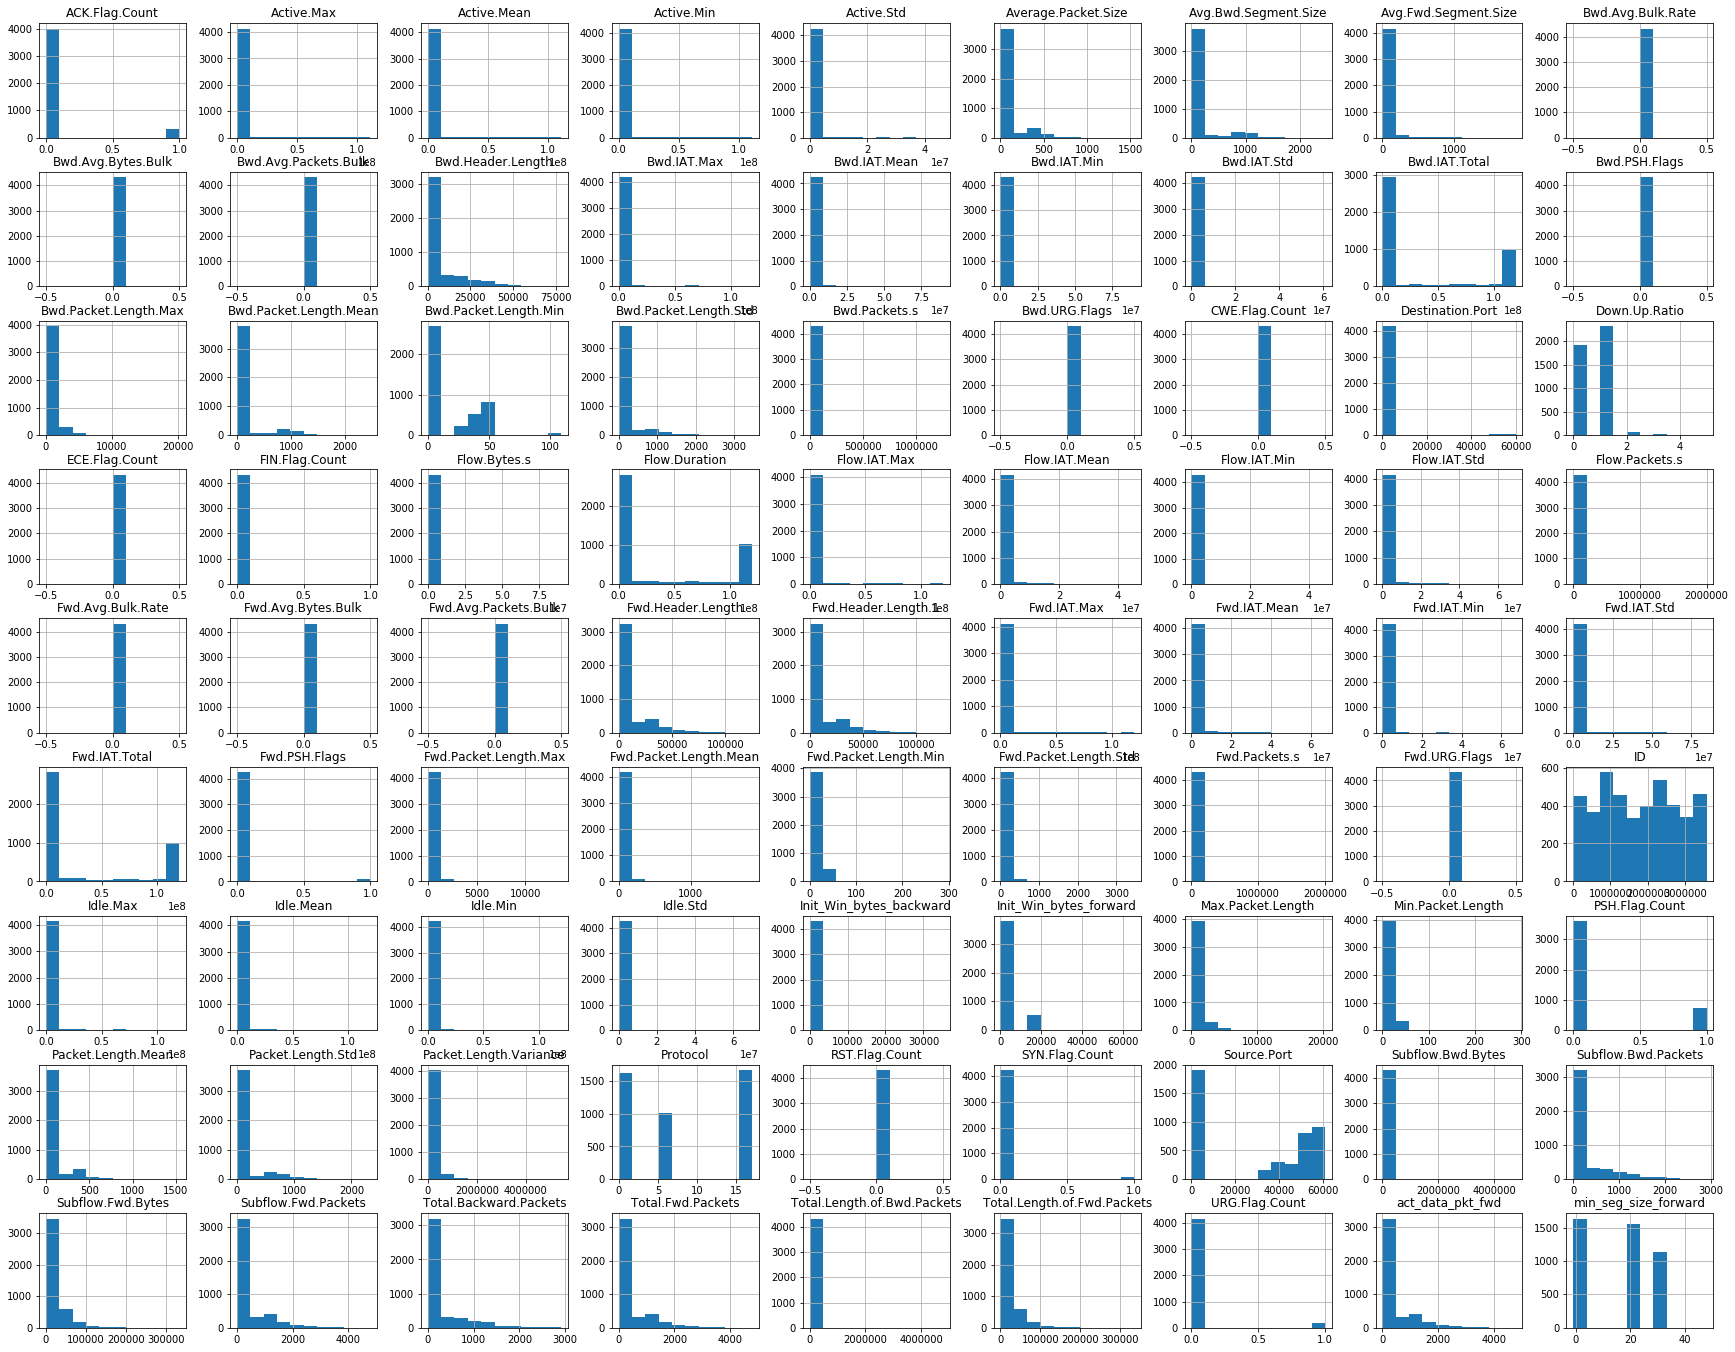

In [5]:
##data visualization 
import seaborn as sns
df[tags].hist(figsize=(30,24))
print()

In [6]:
##data visualization 
df['Source.Port'].value_counts()

0        1631
57429     254
59979     237
51242     225
48859     181
         ... 
35059       1
49382       1
43215       1
45260       1
43007       1
Name: Source.Port, Length: 882, dtype: int64

In [7]:
#data visualization
df['Destination.Port'].value_counts()

0        1631
53       1593
443       812
123       135
51242      40
57429      20
59979      18
48859       8
3128        7
52931       4
54944       4
46237       3
59658       2
45244       2
56147       2
43188       2
35308       2
53926       2
56224       2
50823       2
50607       2
46492       2
32855       2
40797       2
50746       2
42846       2
37884       2
43919       2
56342       1
40068       1
55035       1
44034       1
46306       1
33900       1
37746       1
37542       1
51505       1
36116       1
Name: Destination.Port, dtype: int64

In [8]:
df['Protocol'].value_counts()

17    1675
0     1631
6     1011
Name: Protocol, dtype: int64

In [9]:
##Threre are no duplicate data
##df=df.drop_duplicates()
#df = shuffle(df)
#display(df)

In [10]:
## ground truth cluster
gt_clu = pd.read_csv('./dataset/cluster.csv')
display(gt_clu['Cluster'])

0       0
1       0
2       0
3       0
4       0
       ..
4312    3
4313    3
4314    3
4315    3
4316    3
Name: Cluster, Length: 4317, dtype: int64

In [11]:
num_cols = df._get_numeric_data().columns
cate_cols = list(set(df.columns)-set(num_cols))
cate_cols

['Label', 'Timestamp', 'Source.IP', 'Flow.ID', 'Destination.IP']

In [12]:
df_num = df.drop(['ID', 'Flow.ID', 'Source.IP', 'Destination.IP', 'Timestamp', 'Label'], axis=1)

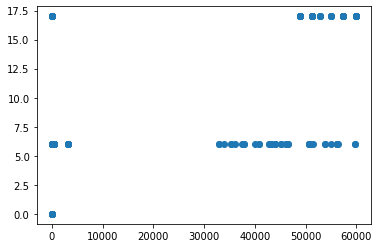

In [15]:
plt.scatter(df['Destination.Port'],df['Protocol'])

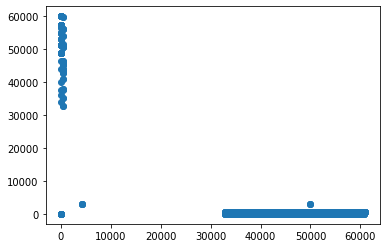

In [16]:
plt.scatter(df['Source.Port'],df['Destination.Port'])

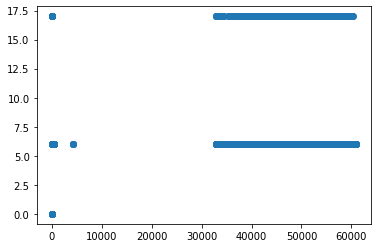

In [17]:
plt.scatter(df['Source.Port'],df['Protocol'])

In [18]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit(df_num)
variances = selector.variances_
dropped_features = df_num.columns.values[variances < 0.01]
print(dropped_features)

['Bwd.PSH.Flags' 'Fwd.URG.Flags' 'Bwd.URG.Flags' 'FIN.Flag.Count'
 'RST.Flag.Count' 'CWE.Flag.Count' 'ECE.Flag.Count' 'Fwd.Avg.Bytes.Bulk'
 'Fwd.Avg.Packets.Bulk' 'Fwd.Avg.Bulk.Rate' 'Bwd.Avg.Bytes.Bulk'
 'Bwd.Avg.Packets.Bulk' 'Bwd.Avg.Bulk.Rate']


In [19]:
## Test the variances values
##df[ 'Bwd.Avg.Bytes.Bulk'].value_counts()

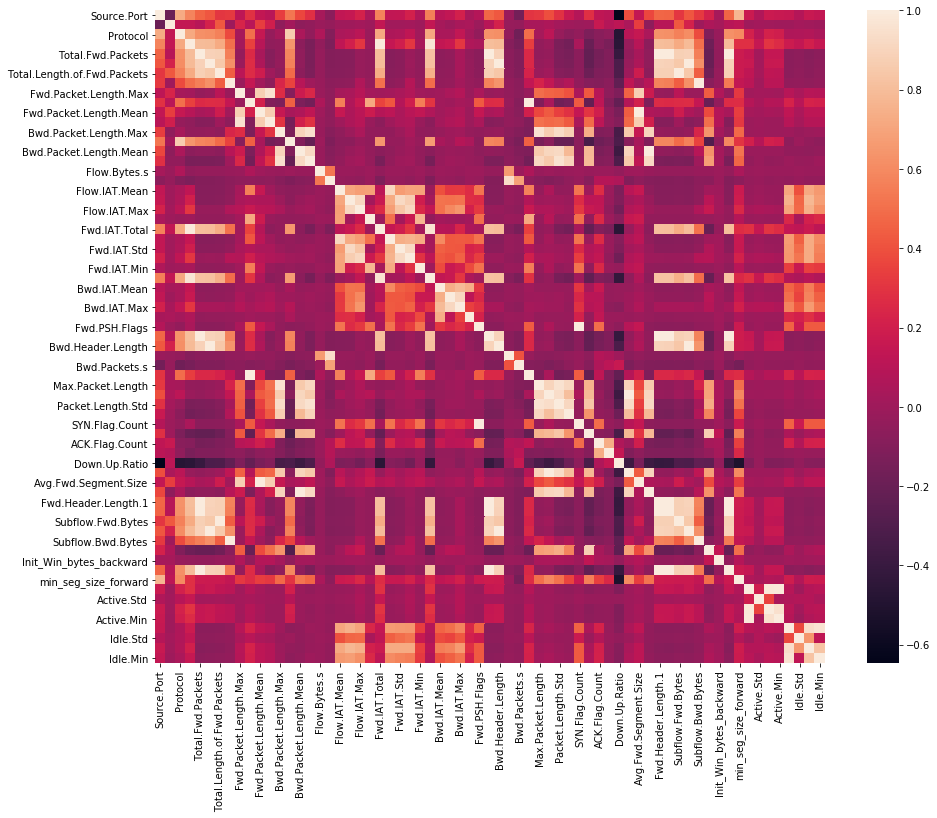

In [20]:
cor_df = df_num.drop(dropped_features,axis=1)

corr_matrix = cor_df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix)
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
def one_hot_and_pca(data, features):
    labelencoder = LabelEncoder()
    pca = PCA(n_components=2)
    onehot_encoding={}
    new_onehot={}
    for symbol in features:
        onehot_encoding[symbol]=pd.get_dummies(data[symbol], prefix=symbol)
      
        new_onehot[symbol] = pd.DataFrame(data=pca.fit_transform(onehot_encoding[symbol]),columns=[symbol+'_0',symbol+'_1'])
    
    new_onehot = pd.concat([new_onehot[symbol] for symbol in features], axis=1)
    return new_onehot

In [22]:
from sklearn import preprocessing
def normalize_process(df):
    
    x = df.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    normalized_X =pd.DataFrame(x_scaled)
    normalized_X.columns = df.columns

    return normalized_X

In [23]:
df_num = df.drop(['ID', 'Flow.ID', 'Source.IP', 'Destination.IP', 'Timestamp', 'Label'], axis=1)

df_num= normalize_process(df_num)

sf=one_hot_and_pca(df, ['Source.Port','Destination.Port'])

onehot_encoding={}
for symbol in ['Label', 'Protocol']:
        onehot_encoding[symbol]=pd.get_dummies(df[symbol], prefix=symbol)
new_onehot = pd.concat([onehot_encoding[symbol] for symbol in ['Label', 'Protocol']], axis=1)

df = pd.concat([df_num, sf, new_onehot],axis=1)

In [24]:
display(df)

,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,...,Idle.Max,Idle.Min,Source.Port_0,Source.Port_1,Destination.Port_0,Destination.Port_1,Label_BENIGN,Protocol_0,Protocol_6,Protocol_17
0,0.647741,0.007386,0.352941,0.016844,0.001668,0.001715,0.002376,0.000131,0.035581,0.00000,...,0.000000,0.000000,-0.340958,-0.019977,0.016794,0.964811,1,0,1,0
1,0.705797,0.007386,0.352941,0.000546,0.002711,0.002744,0.001115,0.001100,0.016293,0.00000,...,0.000000,0.000000,-0.340958,-0.019977,0.016794,0.964811,1,0,1,0
2,0.705912,0.007386,0.352941,0.000892,0.002711,0.004117,0.001115,0.002258,0.016293,0.00000,...,0.000000,0.000000,-0.340958,-0.019977,0.016794,0.964811,1,0,1,0
3,0.706454,0.007386,0.352941,0.000628,0.002711,0.003774,0.001115,0.002258,0.016293,0.00000,...,0.000000,0.000000,-0.340958,-0.019977,0.016794,0.964811,1,0,1,0
4,0.706650,0.007386,0.352941,0.000549,0.002920,0.004460,0.001115,0.002386,0.016293,0.00000,...,0.000000,0.000000,-0.340958,-0.019977,0.016794,0.964811,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,0.983940,0.000884,1.000000,0.992006,0.447341,0.733448,0.239550,0.049175,0.004822,0.09375,...,0.000000,0.000000,-0.438553,-0.438283,0.710405,-0.266629,1,0,0,1
4313,0.983940,0.000884,1.000000,0.261736,0.134724,0.220240,0.072987,0.013750,0.005041,0.09375,...,0.000000,0.000000,-0.438553,-0.438283,0.710405,-0.266629,1,0,0,1
4314,0.801519,0.000884,1.000000,0.636258,0.000626,0.000000,0.000538,0.000000,0.003288,0.15625,...,0.637175,0.637175,-0.410660,-0.073430,0.710405,-0.266629,1,0,0,1
4315,0.801519,0.000884,1.000000,0.113510,0.000626,0.000000,0.000538,0.000000,0.003288,0.15625,...,0.113673,0.113673,-0.410660,-0.073430,0.710405,-0.266629,1,0,0,1


In [25]:
def PCA_process(df):
    X = StandardScaler().fit_transform(df)
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(X)
    return data_pca

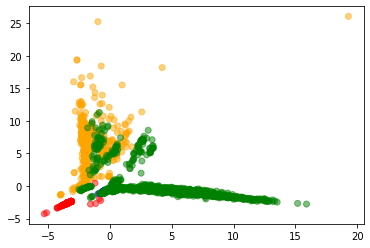

In [36]:
# The ground truth provided by TA
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],c=gt_clu['Cluster'].map({0:'orange',1:'blue',2:'red',3:'green'}), alpha=.5)


0.7974237548937673

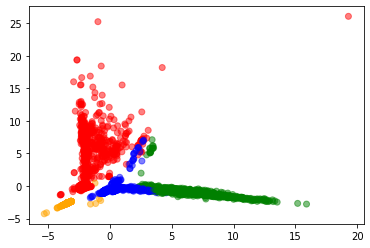

In [26]:
## K-means
#### label encoding of source port and des port label and protocol perform well 
## Q: normalization pac 

X= df.values

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = pd.Series(kmeans.labels_)
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],c=labels.map({0:'orange',1:'blue',2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(gt_clu['Cluster'], kmeans.labels_)

0.8498698090530058

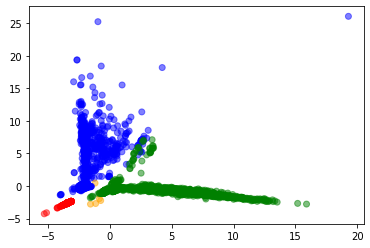

In [27]:
from sklearn.cluster import AgglomerativeClustering

X= df.values

clustering = AgglomerativeClustering(n_clusters=4, affinity='cosine',linkage='single').fit(X)
labels = pd.Series(clustering.labels_)
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],c=labels.map({0:'orange',1:'blue',2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(gt_clu['Cluster'], clustering.labels_)

use e=0.1 and s=5, the best score is 0.5598465125182633
use e=0.1 and s=20, the best score is 0.6092277675011751
use e=0.1 and s=50, the best score is 0.6549841013978253
use e=0.3 and s=5, the best score is 0.7305430657735111
use e=0.4 and s=5, the best score is 0.735538381134757
use e=0.4 and s=50, the best score is 0.7586928902546155
use e=0.5 and s=20, the best score is 0.7631087696979029
use e=0.5 and s=50, the best score is 0.7695308567616652
use e=0.6 and s=50, the best score is 0.7714799949517879
use e=0.6 and s=100, the best score is 0.7733691467266111
use e=0.7 and s=50, the best score is 0.7763579058883209
use e=0.7 and s=100, the best score is 0.7782159547136707
use e=0.8 and s=50, the best score is 0.7807021941801706
use e=0.8 and s=100, the best score is 0.7846517415287015
use e=0.9 and s=5, the best score is 0.7994847458343343
use e=0.9 and s=20, the best score is 0.8071095361245048
use e=1.0 and s=20, the best score is 0.8081252845468156
use e=1.0 and s=50, the best scor

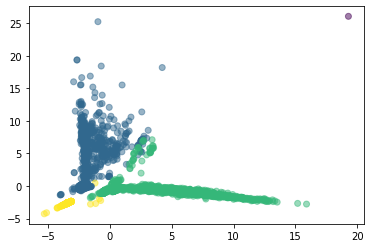

In [28]:
from sklearn.cluster import DBSCAN
X= df.values
score = 0
e = 0
s = 0
for eps in range(1,30,1):
    for min_samples in [5,20,50,100,200]:
        dbscan = DBSCAN(eps=eps/10, min_samples=min_samples).fit(X)
        if adjusted_mutual_info_score(gt_clu['Cluster'], dbscan.labels_)>score:
            score = adjusted_mutual_info_score(gt_clu['Cluster'], dbscan.labels_)
            e = eps
            s = min_samples
            print(f"use e={e/10} and s={s}, the best score is {score}")

dbscan = DBSCAN(eps=e/10, min_samples=s).fit(X)
adjusted_mutual_info_score(gt_clu['Cluster'], dbscan.labels_)
labels = pd.Series(dbscan.labels_)
plt.scatter(data_pca[:, 0], data_pca[:, 1],c=labels, alpha=.5)

In [29]:
def k_mean(kmean_X, best_acc):
    km = KMeans(n_clusters=4,random_state=0 )
    clusters = km.fit(kmean_X)
    kmean_y = km.fit_predict(kmean_X)
    acc = adjusted_mutual_info_score(gt_clu['Cluster'], kmean_y)
    return acc

In [30]:
import warnings
def find_best2_feature(df):
    
    kmean_best_acc = 0
    kmean_best_ftr = []
    for idx, col1 in enumerate(df.columns):
        for col2 in df.columns[idx+1:len(df)]:
            tmp_df = df[[col1, col2]].values
            tmp_df = StandardScaler().fit_transform(tmp_df)

            ## k-means

            kmean_acc = k_mean(tmp_df, kmean_best_acc)
            if kmean_acc > kmean_best_acc:
                kmean_best_acc = kmean_acc
                kmean_best_ftr = [col1, col2]
                print("K-means\n", "-"*30)
                print("Current best accuracy score: \t", kmean_best_acc)
                print("Current best feature: \t", kmean_best_ftr)

    print("-"*15, "Result: ", "-"*15)
    print("K-means| " , "accuracy: ", kmean_best_acc, "feature: ", kmean_best_ftr)


In [31]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    find_best2_feature(df)


K-means
 ------------------------------
Current best accuracy score: 	 0.6393548225029877
Current best feature: 	 ['Source.Port', 'Destination.Port']
K-means
 ------------------------------
Current best accuracy score: 	 0.8176580776308202
Current best feature: 	 ['Source.Port', 'Protocol']
K-means
 ------------------------------
Current best accuracy score: 	 0.9196742097137706
Current best feature: 	 ['Source.Port', 'Destination.Port_0']
--------------- Result:  ---------------
K-means|  accuracy:  0.9256311364608241 feature:  ['Fwd.Packet.Length.Min', 'Destination.Port_0']


In [38]:
new_onehot={}
onehot_encoding={}
for symbol in ['Source.Port','Destination.Port', 'Protocol']:
        onehot_encoding[symbol]=pd.get_dummies(df[symbol], prefix=symbol)
test = pd.concat([onehot_encoding[symbol] for symbol in ['Source.Port','Destination.Port', 'Protocol']], axis=1)
test

,Source.Port_0.0,Source.Port_0.0008694510974769515,Source.Port_0.0020177827356540573,Source.Port_0.007267298795892254,Source.Port_0.06957249253584435,Source.Port_0.538058991436727,Source.Port_0.5381410151251682,Source.Port_0.5381738246005446,Source.Port_0.5383378719774271,Source.Port_0.5390596804357098,...,Destination.Port_0.9175711499024658,Destination.Port_0.9361109721735941,Destination.Port_0.9373947548308574,Destination.Port_0.9393621100718584,Destination.Port_0.9574851197919271,Destination.Port_0.9946481268443955,Destination.Port_0.9999999999999999,Protocol_0.0,Protocol_0.3529411764705882,Protocol_1.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


0.9904195002627223

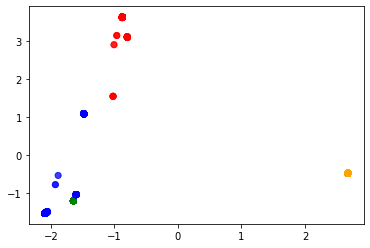

In [39]:
X= test.values

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = pd.Series(kmeans.labels_)
data_pca = PCA_process(few_features)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels.map({0:'orange',1:'blue',2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(gt_clu['Cluster'], kmeans.labels_)

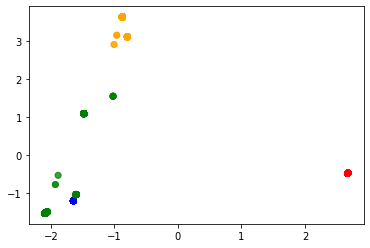

In [40]:
data_pca = PCA_process(test)
plt.scatter(data_pca[:, 0], data_pca[:, 1],c=gt_clu['Cluster'].map({0:'orange',1:'blue',2:'red',3:'green'}), alpha=.5)